In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
import statistics as stats

In [2]:
df = pd.read_csv('Iris1.csv')
df.head()

,Id,Location,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,Torgersen,5.1,3.5,1.4,0.2,Iris-setosa
1,2,Torgersen,4.9,3.0,1.4,0.2,Iris-setosa
2,3,Torgersen,4.7,3.2,1.3,0.2,Iris-setosa
3,4,Torgersen,4.6,3.1,1.5,0.2,Iris-setosa
4,5,Torgersen,5.0,3.6,1.4,0.2,Iris-setosa


1. Read the dataset and do necessary preprocessing [data imputation in null values, use
encoding techniques to convert categorical to numerical]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   Location       100 non-null    object 
 2   SepalLengthCm  98 non-null     float64
 3   SepalWidthCm   97 non-null     float64
 4   PetalLengthCm  99 non-null     float64
 5   PetalWidthCm   99 non-null     float64
 6   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

for i in df.columns:
  if i in df.select_dtypes("object").columns:
    df[i] = LabelEncoder.fit_transform(df[i])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   Location       100 non-null    int64  
 2   SepalLengthCm  98 non-null     float64
 3   SepalWidthCm   97 non-null     float64
 4   PetalLengthCm  99 non-null     float64
 5   PetalWidthCm   99 non-null     float64
 6   Species        100 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 5.6 KB
None


In [5]:
for i in df.columns:
   df[i].fillna(df[i].mean(), inplace = True)
   df.isnull().sum()

In [25]:
x = df[['Location', 'SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df.iloc[:, -1]

2. Determine the number of epochs which have minimum error [0/0.1/0.2]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=42)
model = Perceptron(max_iter=20)

In [65]:
pred = model.fit(X_train, y_train)

In [66]:
model.score(X_test,y_test)

1.0

In [67]:
ypred = model.predict(X_test)
ypred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1])

In [68]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

acc = accuracy_score(ypred, y_test)

print("accuracy :", acc)

accuracy : 1.0


In [69]:
mse = mean_squared_error(ypred, y_test)
print("mse:", mse)
rmse = np.sqrt(mse)
print("Rmse:", rmse)
mae = mean_absolute_error(ypred, y_test)
print("mae:", mae)

mse: 0.0
Rmse: 0.0
mae: 0.0


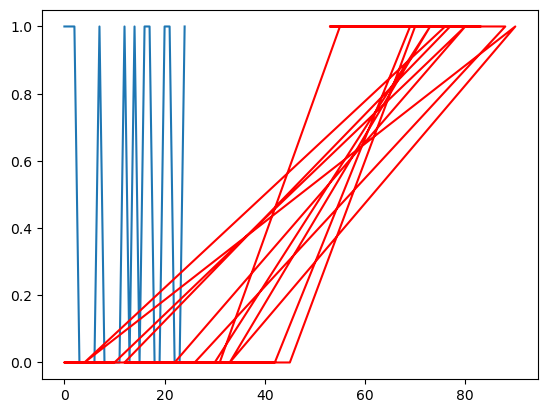

In [70]:
import matplotlib.pyplot as plt

plt.plot(ypred)
plt.plot(y_test, color = 'red')

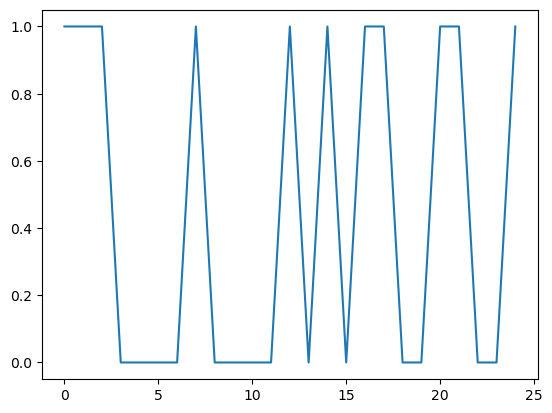

In [73]:
plt.plot(ypred)

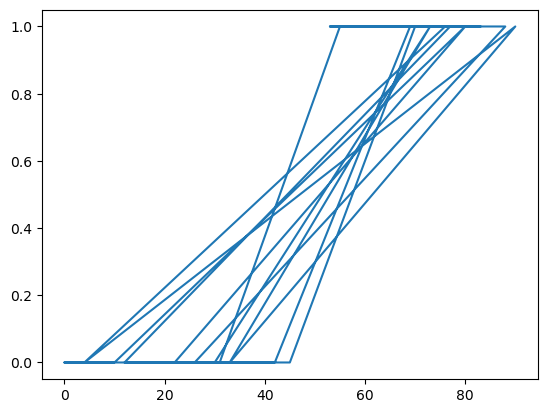

In [74]:
plt.plot(y_test)

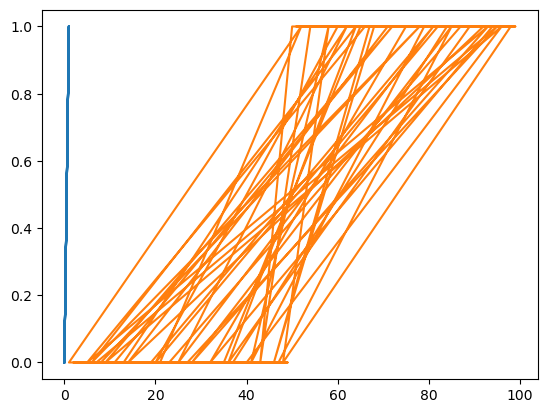

In [72]:
plt.plot(y_test, ypred, y_train)